# Sections of this project!
[Importing Packages][Importing-Packages]

[Importing-Packages]: #Importing-Packages


[Setting-Parameters-for-API-Pull][Setting-Parameters-for-API-Pull]

[Setting-Parameters-for-API-Pull]: #Setting-Parameters-for-API-Pull


[Creating-Function-for-API-pull][Creating-Function-for-API-pull]

[Creating-Function-for-API-pull]: #Creating-Function-for-API-pull

# Importing Packages

In [390]:
# Installing Packages
!{sys.executable} -m pip install nba_api --quiet
!{sys.executable} -m pip install pandas --quiet
!{sys.executable} -m pip install tqdm --quiet

#Importing packages
from nba_api.stats.static import players
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.endpoints import commonplayerinfo
from nba_api.stats.endpoints import playbyplayv2
import requests, pandas as pd, sys
from tqdm import tqdm
import dateutil.parser as parser
import numpy as np
import time
import seaborn as sns
from datetime import datetime,  timedelta

## Setting Pandas option to show all columns

In [391]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 25)

# Creating Function for API pull

### Setting parameters for data pull

In [392]:
#Creating header var for api pull
headers: dict[str, str]  = {
    'Connection': 'keep-alive',
    'Accept': 'application/json, text/plain, */*',
    'x-nba-stats-token': 'true',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
    'x-nba-stats-origin': 'stats',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-Mode': 'cors',
    'Referer': 'https://stats.nba.com/',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
}

### Function that Pulls API data

In [393]:
# create function that gets pbp (play by play) logs from the 2021-22 season
def get_data(game_id) -> pd.DataFrame:
    play_by_play_url = "https://cdn.nba.com/static/json/liveData/playbyplay/playbyplay_"+game_id+".json"
    response = requests.get(url=play_by_play_url, headers=headers).json()
    play_by_play = response['game']['actions']
    df = pd.DataFrame(play_by_play)
    df['gameid'] = game_id
    return df

### Defining parameters for data pull

In [394]:
gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable='2021-22',
                                               league_id_nullable='00',
                                               season_type_nullable='Regular Season')

## Retrieving Game Ids

## List of unique game ids for 2021-2022 season

In [395]:
games = gamefinder.get_data_frames()[0]
#getting a list of distinct game ids
game_ids = games['GAME_ID'].unique()
len(game_ids)

1230

In [396]:
# Retrieving all game dataframes to get unique game ids
games = gamefinder.get_data_frames()[0]

#getting a list of distinct game ids
game_ids = games['GAME_ID'].unique()

# Setting an empty list for the game information
pbpdata = []

#Here TDQM() creates a % completion bar
for game_id in tqdm(game_ids):
    game_data: pd.DataFrame = get_data(game_id)
    pbpdata.append(game_data)

final_df: pd.DataFrame = pd.concat(pbpdata, ignore_index=True)

100%|██████████| 1230/1230 [05:24<00:00,  3.79it/s]


## Instantiating Data Frame

In [397]:
final_df_copy: pd.DataFrame = pd.DataFrame(final_df)

## Reviewing Column Names

In [398]:
#Primary columns in the DF
final_df_copy.columns

Index(['actionNumber', 'clock', 'timeActual', 'period', 'periodType', 'actionType', 'subType', 'qualifiers', 'personId', 'x', 'y', 'possession', 'scoreHome', 'scoreAway', 'edited', 'orderNumber', 'xLegacy', 'yLegacy', 'isFieldGoal', 'side', 'description', 'personIdsFilter', 'teamId', 'teamTricode', 'descriptor', 'jumpBallRecoveredName', 'jumpBallRecoverdPersonId', 'playerName', 'playerNameI', 'jumpBallWonPlayerName', 'jumpBallWonPersonId', 'jumpBallLostPlayerName', 'jumpBallLostPersonId', 'shotDistance', 'shotResult', 'pointsTotal', 'assistPlayerNameInitial', 'assistPersonId', 'assistTotal', 'shotActionNumber', 'reboundTotal', 'reboundDefensiveTotal', 'reboundOffensiveTotal', 'officialId', 'foulPersonalTotal', 'foulTechnicalTotal', 'foulDrawnPlayerName', 'foulDrawnPersonId', 'blockPlayerName', 'blockPersonId', 'turnoverTotal', 'stealPlayerName', 'stealPersonId', 'value', 'gameid'], dtype='object')

In [399]:
final_df_copy.head()

,actionNumber,clock,timeActual,period,periodType,actionType,subType,qualifiers,personId,x,y,possession,scoreHome,scoreAway,edited,orderNumber,xLegacy,yLegacy,isFieldGoal,side,description,personIdsFilter,teamId,teamTricode,descriptor,jumpBallRecoveredName,jumpBallRecoverdPersonId,playerName,playerNameI,jumpBallWonPlayerName,jumpBallWonPersonId,jumpBallLostPlayerName,jumpBallLostPersonId,shotDistance,shotResult,pointsTotal,assistPlayerNameInitial,assistPersonId,assistTotal,shotActionNumber,reboundTotal,reboundDefensiveTotal,reboundOffensiveTotal,officialId,foulPersonalTotal,foulTechnicalTotal,foulDrawnPlayerName,foulDrawnPersonId,blockPlayerName,blockPersonId,turnoverTotal,stealPlayerName,stealPersonId,value,gameid
0,2,PT12M00.00S,2022-04-11T01:41:15.8Z,1,REGULAR,period,start,[],0,NaN,NaN,0,0,0,2022-04-11T01:41:15Z,20000,NaN,NaN,0,None,Period Start,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0022101220
1,4,PT11M57.00S,2022-04-11T01:41:17.9Z,1,REGULAR,jumpball,recovered,[],203085,NaN,NaN,1610612743,0,0,2022-04-11T01:41:17Z,40000,NaN,NaN,0,None,Jump Ball J. Green vs. W. Gabriel: Tip to A. R...,"[203085, 201145, 1629117]",1.610613e+09,DEN,startperiod,A. Rivers,203085.0,Rivers,A. Rivers,Green,201145.0,Gabriel,1629117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0022101220
2,7,PT11M39.00S,2022-04-11T01:41:35.2Z,1,REGULAR,3pt,Jump Shot,[],1627854,77.611695,88.970588,1610612743,3,0,2022-04-11T01:41:40Z,70000,195.0,158.0,1,right,B. Forbes 25' 3PT (3 PTS) (A. Rivers 1 AST),"[1627854, 203085]",1.610613e+09,DEN,NaN,NaN,NaN,Forbes,B. Forbes,NaN,NaN,NaN,NaN,25.09,Made,3.0,A. Rivers,203085.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0022101220
3,9,PT11M16.00S,2022-04-11T01:41:58.3Z,1,REGULAR,2pt,Layup,[pointsinthepaint],1626169,6.915243,46.568627,1610612747,3,2,2022-04-11T01:42:05Z,90000,17.0,13.0,1,left,S. Johnson Layup (2 PTS) (T. Horton-Tucker 1 AST),"[1626169, 1629659]",1.610613e+09,LAL,NaN,NaN,NaN,Johnson,S. Johnson,NaN,NaN,NaN,NaN,2.13,Made,2.0,T. Horton-Tucker,1629659.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0022101220
4,11,PT11M00.00S,2022-04-11T01:42:14.1Z,1,REGULAR,3pt,Jump Shot,[],1627854,68.413272,28.186275,1610612743,3,2,2022-04-11T01:42:17Z,110000,-109.0,244.0,1,right,MISS B. Forbes 26' 3PT,[1627854],1.610613e+09,DEN,NaN,NaN,NaN,Forbes,B. Forbes,NaN,NaN,NaN,NaN,26.76,Missed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0022101220


In [400]:
final_df_copy.describe()

,actionNumber,period,personId,x,y,possession,orderNumber,xLegacy,yLegacy,isFieldGoal,teamId,jumpBallRecoverdPersonId,jumpBallWonPersonId,jumpBallLostPersonId,shotDistance,pointsTotal,assistPersonId,assistTotal,shotActionNumber,reboundTotal,reboundDefensiveTotal,reboundOffensiveTotal,officialId,foulPersonalTotal,foulTechnicalTotal,foulDrawnPersonId,blockPersonId,turnoverTotal,stealPersonId
count,691875.000000,691875.000000,6.918750e+05,216713.000000,216713.000000,6.918750e+05,6.918750e+05,216713.000000,216713.000000,691875.000000,6.650260e+05,2.087000e+03,2.183000e+03,2.183000e+03,216713.000000,141587.000000,6.063600e+04,60636.000000,128907.000000,109347.000000,109347.000000,109347.000000,6.832800e+04,49746.000000,49746.000000,4.830600e+04,1.160300e+04,32102.000000,1.876000e+04
mean,338.339700,2.547697,1.031516e+06,49.968831,49.575517,1.604646e+09,3.322918e+06,-2.716113,96.808876,0.313226,1.610613e+09,1.116123e+06,1.029718e+06,1.110913e+06,14.284271,9.896961,1.092272e+06,3.094878,329.759261,4.023192,3.071653,0.951540,4.515309e+05,1.995055,0.062156,1.095785e+06,1.144186e+06,1.905613,1.155470e+06
std,194.280636,1.128020,7.275118e+05,35.589950,22.923325,9.784667e+07,1.906753e+06,114.604103,95.291674,0.463806,8.643626e+00,6.896156e+05,7.075713e+05,6.887543e+05,10.578877,7.440506,6.947680e+05,2.405318,196.023594,3.070912,2.462871,1.269107,6.427159e+05,1.130653,0.252112,6.935572e+05,6.794527e+05,1.214381,6.751063e+05
min,2.000000,1.000000,0.000000e+00,0.213535,0.000000,0.000000e+00,2.000000e+04,-250.000000,-51.000000,0.000000,1.610613e+09,2.544000e+03,2.544000e+03,2.544000e+03,0.000000,1.000000,2.544000e+03,1.000000,3.000000,1.000000,0.000000,0.000000,1.146000e+03,0.000000,0.000000,2.544000e+03,2.544000e+03,1.000000,2.544000e+03
25%,170.000000,2.000000,2.030760e+05,11.563732,39.460784,1.610613e+09,1.680000e+06,-53.000000,14.000000,0.000000,1.610613e+09,2.032000e+05,2.035000e+05,2.035165e+05,3.140000,4.000000,2.034630e+05,1.000000,160.000000,2.000000,1.000000,0.000000,2.005000e+03,1.000000,0.000000,2.034960e+05,2.034970e+05,1.000000,2.035010e+05
50%,336.000000,3.000000,1.627759e+06,57.506570,50.000000,1.610613e+09,3.300000e+06,0.000000,57.000000,0.000000,1.610613e+09,1.628366e+06,1.626174e+06,1.627745e+06,13.940000,8.000000,1.627826e+06,2.000000,329.000000,3.000000,2.000000,1.000000,2.016400e+05,2.000000,0.000000,1.627814e+06,1.628381e+06,1.000000,1.628374e+06
75%,503.000000,4.000000,1.629632e+06,88.354139,59.068627,1.610613e+09,4.940000e+06,47.000000,184.000000,1.000000,1.610613e+09,1.629632e+06,1.629011e+06,1.629603e+06,25.080000,14.000000,1.629636e+06,4.000000,496.000000,5.000000,4.000000,1.000000,2.040580e+05,3.000000,0.000000,1.629630e+06,1.629647e+06,2.000000,1.629655e+06
max,893.000000,7.000000,1.630994e+06,99.819317,99.754902,1.610613e+09,8.750000e+06,250.000000,878.000000,1.000000,1.610613e+09,1.630787e+06,1.630846e+06,1.630846e+06,88.940000,60.000000,1.630994e+06,19.000000,890.000000,25.000000,21.000000,12.000000,1.629422e+06,6.000000,3.000000,1.630994e+06,1.630846e+06,10.000000,1.630994e+06


# _Data Manipulation and Formating_

### Checking data types

In [401]:
### Transforming data types
dict(final_df_copy.dtypes)

{'actionNumber': dtype('int64'),
 'clock': dtype('O'),
 'timeActual': dtype('O'),
 'period': dtype('int64'),
 'periodType': dtype('O'),
 'actionType': dtype('O'),
 'subType': dtype('O'),
 'qualifiers': dtype('O'),
 'personId': dtype('int64'),
 'x': dtype('float64'),
 'y': dtype('float64'),
 'possession': dtype('int64'),
 'scoreHome': dtype('O'),
 'scoreAway': dtype('O'),
 'edited': dtype('O'),
 'orderNumber': dtype('int64'),
 'xLegacy': dtype('float64'),
 'yLegacy': dtype('float64'),
 'isFieldGoal': dtype('int64'),
 'side': dtype('O'),
 'description': dtype('O'),
 'personIdsFilter': dtype('O'),
 'teamId': dtype('float64'),
 'teamTricode': dtype('O'),
 'descriptor': dtype('O'),
 'jumpBallRecoveredName': dtype('O'),
 'jumpBallRecoverdPersonId': dtype('float64'),
 'playerName': dtype('O'),
 'playerNameI': dtype('O'),
 'jumpBallWonPlayerName': dtype('O'),
 'jumpBallWonPersonId': dtype('float64'),
 'jumpBallLostPlayerName': dtype('O'),
 'jumpBallLostPersonId': dtype('float64'),
 'shotDistan

### Creating a new data fame with players removed if they do not play atleast 20 games ///and have more than 10 combined PTS/REB/AST avg per game

In [484]:
player_games_played: pd.DataFrame = final_df_copy[['gameid','playerNameI', 'personId']].groupby(['personId', 'playerNameI'], as_index=False).nunique().sort_values('gameid', ascending=False)
players_with_20more_games = player_games_played[player_games_played.gameid >= 20].personId

player_stats_threshold: pd.DataFrame = final_df_copy[['gameid','playerNameI', 'personId', 'pointsTotal', 'assistTotal', 'reboundTotal']].groupby(['personId', 'playerNameI', 'gameid'], as_index=False).max().sort_values('gameid', ascending=False)
player_stats_threshold['combined_totals'] = player_stats_threshold.iloc[:, 3:].sum(axis=1)
player_stats_threshold_avgs = player_stats_threshold.groupby(['personId', 'playerNameI'], as_index=False)['combined_totals'].mean()
player_stats_threshold_id_list = player_stats_threshold_avgs[player_stats_threshold_avgs.combined_totals >= 10]

joined_player_id_list = pd.merge(player_stats_threshold_id_list, players_with_20more_games, how='inner', on=['personId']).personId

In [485]:
df_players_removed: pd.DataFrame = final_df_copy.query('personId in @joined_player_id_list')

# Time Conversion Functions
### Creating columns for "Time Passed in Game" and "Date of Game"

In [486]:
# creating a date column
df_players_removed['dateGameStarted'] = pd.to_datetime(df_players_removed.timeActual).dt.date

# Need to use columns:  Period and Clock to determine what time in the game it is (Clock counts down per period)
# period_to_total_time 

# create a fucntion and use map to apply it to the new column

def period_to_time_conversion(value) -> int:

    if value == 1:
        return 0
    elif value == 2:
        return 12
    elif value == 3:
        return 24
    else:
        return 36

df_players_removed['period_to_time'] = df_players_removed['period'].map(period_to_time_conversion)    

def time_conversion(unparsed_timearray):
    x = datetime(year =1900, month=1, day=1, hour=0, minute=12, second=0)
    values_array = unparsed_timearray[0:7]
    time_passed_total = x - pd.to_datetime(values_array, format='PT%MM%S')
    return time_passed_total

df_players_removed['time_passed_in_seconds'] = df_players_removed['clock'].map(time_conversion)

# Creating a function to create new column with total time passed in game
def total_time_passed(period_finished_minutes, minutes_passed_within_period):
    period_minutes = pd.to_datetime(period_finished_minutes, format='%M')
    minutes_within_period = minutes_passed_within_period
    return period_minutes + minutes_within_period

df_players_removed['Total_time_passed_in_game'] = list(map(total_time_passed, df_players_removed.period_to_time, df_players_removed.time_passed_in_seconds))

/var/folders/_l/4wqjn4456n15dy3l1xmxt0nh0000gn/T/ipykernel_3085/1635802243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_players_removed['dateGameStarted'] = pd.to_datetime(df_players_removed.timeActual).dt.date


### Preping a mapping dict for player names and Player Ids

In [495]:
#Changing column to int data type
df_players_removed.assistPersonId = final_df_copy.assistPersonId.astype('Int64')

# Creating a dict for mapping object of names and ids
playerid_and_player_initials_dict_assists =dict(zip(df_players_removed.assistPlayerNameInitial.values, df_players_removed.assistPersonId))
playerid_and_player_initials_dict_playername_to_personid =dict(zip(df_players_removed.playerNameI.values, df_players_removed.personId))
playerid_and_player_initials_dict_combined = playerid_and_player_initials_dict_assists | playerid_and_player_initials_dict_playername_to_personid

/var/folders/_l/4wqjn4456n15dy3l1xmxt0nh0000gn/T/ipykernel_3085/4111727379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_players_removed.assistPersonId = final_df_copy.assistPersonId.astype('Int64')


# Data Frame Fuctions
### Creating TS% (true shooting percetage) data frames

In [518]:
def ts_perc_dataframe_creation(input_dataframe: pd.DataFrame)-> pd.DataFrame:        
        
        df_most_info = input_dataframe\
                .groupby(['playerNameI','gameid', 'personId'], as_index=False)\
                .agg({'isFieldGoal':np.sum,\
                'dateGameStarted':np.min,\
                'pointsTotal': np.max,})

        df_fta = input_dataframe[ ((input_dataframe.actionType == 'freethrow'))]\
                .groupby(['playerNameI','personId','gameid', 'actionType'], as_index=False)['actionType'].count()
                # .agg({'actionType': 'sum'})

        #Merging DFs on columns gameid and playernamei
        combined_df_all_metrics = pd.merge(df_most_info, df_fta, how='left', on=['personId','playerNameI','gameid'])

        # Renaming Column Names
        combined_df_all_metrics = combined_df_all_metrics.rename(columns={'isFieldGoal':'FGA', 'actionType':'FTA'})

        # Moving columns to a better order
        cols: list[str] = ['dateGameStarted', 'gameid', 'playerNameI', 'pointsTotal', 'FGA', 'FTA']
        combined_df_all_metrics = combined_df_all_metrics[cols]

        # Replacing Nans in the DF with 0s
        combined_df_all_metrics =combined_df_all_metrics.fillna(0)

        # Creating TS% column
        combined_df_all_metrics['TS%'] = round((combined_df_all_metrics['pointsTotal'])/\
                        (2*((combined_df_all_metrics['FGA'])+ (combined_df_all_metrics['FTA']*.44))) * 100,3)
        
        return combined_df_all_metrics

In [519]:
df_groupby = ts_perc_dataframe_creation(df_players_removed)

In [520]:
df_groupby

,dateGameStarted,gameid,playerNameI,pointsTotal,FGA,FTA,TS%
0,2021-10-20,0022100002,A. Bradley,6.0,3,0.0,100.000
1,2021-10-23,0022100025,A. Bradley,0.0,3,0.0,0.000
2,2021-10-25,0022100040,A. Bradley,0.0,0,0.0,NaN
3,2021-10-28,0022100061,A. Bradley,13.0,7,0.0,92.857
4,2021-10-30,0022100077,A. Bradley,7.0,5,0.0,70.000
...,...,...,...,...,...,...,...
20852,2022-04-02,0022101155,Z. Williams,19.0,15,4.0,56.683
20853,2022-04-06,0022101187,Z. Williams,9.0,6,4.0,57.990
20854,2022-04-08,0022101201,Z. Williams,12.0,8,2.0,67.568
20855,2022-04-09,0022101213,Z. Williams,19.0,12,3.0,71.321


In [500]:
df_groupby.sort_values(['TS%'], ascending=False).head()

,dateGameStarted,gameid,playerNameI,pointsTotal,FGA,FTA,TS%
20651,2021-10-26,0022100048,Z. Nnaji,3.0,1,0.0,150.0
20433,2022-01-14,0022100629,W. Gabriel,3.0,1,0.0,150.0
15362,2021-11-07,0022100141,M. Wagner,3.0,1,0.0,150.0
735,2021-12-01,0022100318,A. Len,3.0,1,0.0,150.0
5000,2022-03-08,0022100969,D. Green,3.0,1,0.0,150.0


In [501]:
##### ISSUES PLAYERS ARE GETTING GROUPED INTO MULTIPLE GAMES 
# https://www.basketball-reference.com/boxscores/202111030CLE.html # This is the game for 11/03/2021
# but there are no CAVS games on 11/04/2021

# This is most likely an issue that stems from games going into the next "day"
# Need to test this on the group by function that was created earlier
df_groupby[(df_groupby.gameid == '0022100108') & (df_groupby.playerNameI == 'D. Windler')]
df_groupby['TS%'].value_counts()

50.000     952
0.000      804
100.000    340
75.000     299
66.667     293
          ... 
89.542       1
97.962       1
14.793       1
66.199       1
46.215       1
Name: TS%, Length: 2902, dtype: int64

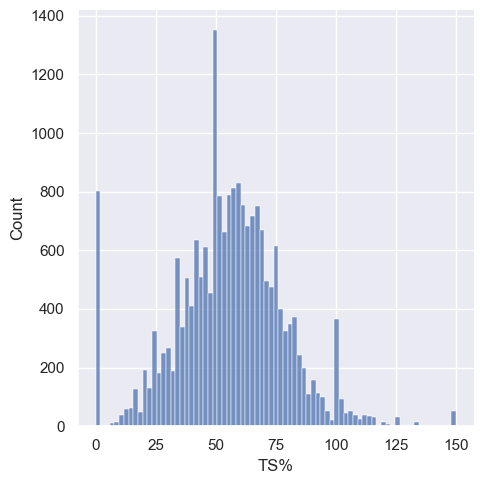

In [502]:
# Plotting distribution of TS%s of all players in the 2021-2022 season
sns.displot(df_groupby, x='TS%')

In [554]:
def ts_perc_dataframe_creation_whole_season(input_dataframe: pd.DataFrame)-> pd.DataFrame:
        
        df_most_info = input_dataframe\
                .groupby(['playerNameI', 'personId'], as_index=False)\
                .agg({'isFieldGoal':np.sum,\
                        'shotDistance':np.sum})

        df_points_per_game = input_dataframe\
                .groupby(['playerNameI','gameid', 'personId'], as_index=False)\
                .agg({'pointsTotal': np.max,})
        
        df_points_seaon_totals = df_points_per_game\
                .groupby(['playerNameI','personId'], as_index=False)\
                .agg({'pointsTotal': np.sum,})

        df_fta = input_dataframe[ ((input_dataframe.actionType == 'freethrow'))]\
                .groupby(['playerNameI','personId', 'actionType'], as_index=False)['actionType'].count()

        # Merging most and total_points
        df_points_and_most = pd.merge(df_most_info, df_points_seaon_totals, how='inner', on=['personId','playerNameI',])

        #Merging DFs on columns playernamei and personId
        combined_df_all_metrics_season = pd.merge(df_points_and_most, df_fta, how='left', on=['personId','playerNameI',])

        # Renaming Column Names
        combined_df_all_metrics_season = combined_df_all_metrics_season.rename(columns={'isFieldGoal':'FGA', 'actionType':'FTA'})

        # Moving columns to a better order
        cols: list[str] = ['playerNameI', 'pointsTotal', 'FGA', 'FTA', 'shotDistance']
        combined_df_all_metrics_season = combined_df_all_metrics_season[cols]

        # Replacing Nans in the DF with 0s
        combined_df_all_metrics_season =combined_df_all_metrics_season.fillna(0)

        # Creating TS% column
        combined_df_all_metrics_season['TS%'] = round((combined_df_all_metrics_season['pointsTotal'])/\
                        (2*((combined_df_all_metrics_season['FGA'])+ (combined_df_all_metrics_season['FTA']*.44))) * 100,3)

        combined_df_all_metrics_season['avg_shot_distance'] = round(combined_df_all_metrics_season.shotDistance/combined_df_all_metrics_season.FGA,3)
        
        return combined_df_all_metrics_season

In [555]:
df_groupby_season = ts_perc_dataframe_creation_whole_season(df_players_removed)

In [556]:
df_groupby_season

,playerNameI,pointsTotal,FGA,FTA,shotDistance,TS%,avg_shot_distance
0,A. Bradley,394.0,350,18,6317.45,55.040,18.050
1,A. Burks,944.0,728,264,12635.16,55.914,17.356
2,A. Caruso,304.0,257,73,3992.20,52.573,15.534
3,A. Coffey,619.0,466,117,7817.39,59.809,16.776
4,A. Davis,927.0,695,244,6686.61,57.767,9.621
...,...,...,...,...,...,...,...
342,X. Tillman,252.0,216,71,2064.39,50.963,9.557
343,Z. Collins,218.0,155,65,1711.84,59.368,11.044
344,Z. LaVine,1635.0,1185,375,18060.08,60.556,15.241
345,Z. Nnaji,270.0,186,65,2430.48,62.908,13.067


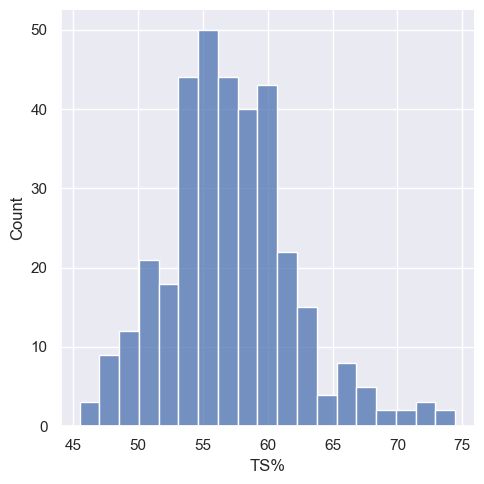

In [544]:
sns.displot(df_groupby_season, x='TS%')

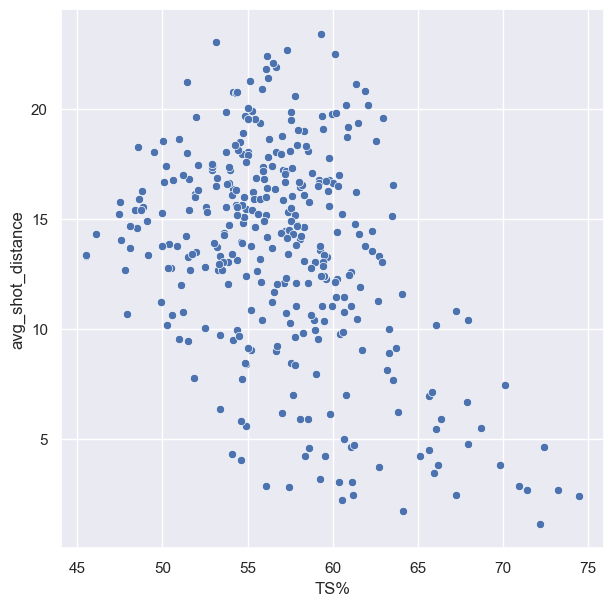

In [560]:
# Map TS% and average distance per shot for the whole season
sns.set(rc={'figure.figsize':(7,7)})
sns.scatterplot(df_groupby_season, x='TS%', y='avg_shot_distance');

## Analyzing % of shots missed and made by distance

In [420]:
# Creating 2 distributions of shots made from distance and shots missed from distance
# final_df_copy.shotDistance = final_df_copy.shotDistance.round(1)
df_shot_made = final_df_copy[((final_df_copy.actionType != 'freethrow') & (final_df_copy.shotResult == 'Made'))][['shotDistance', 'shotResult', 'actionType']]
df_shot_missed = final_df_copy[((final_df_copy.actionType != 'freethrow') & (final_df_copy.shotResult == 'Missed'))][['shotDistance', 'shotResult', 'actionType']]
df_shots_combined = pd.concat([df_shot_made, df_shot_missed])
df_shots_combined = df_shots_combined[df_shots_combined.shotDistance <= 46.0]

In [421]:
df_shots_combined.shotDistance.max()
# df_shot_missed.shotDistance.min()

45.99

In [422]:
### Plotting charts for shot makes and miss distribution
import seaborn as sns

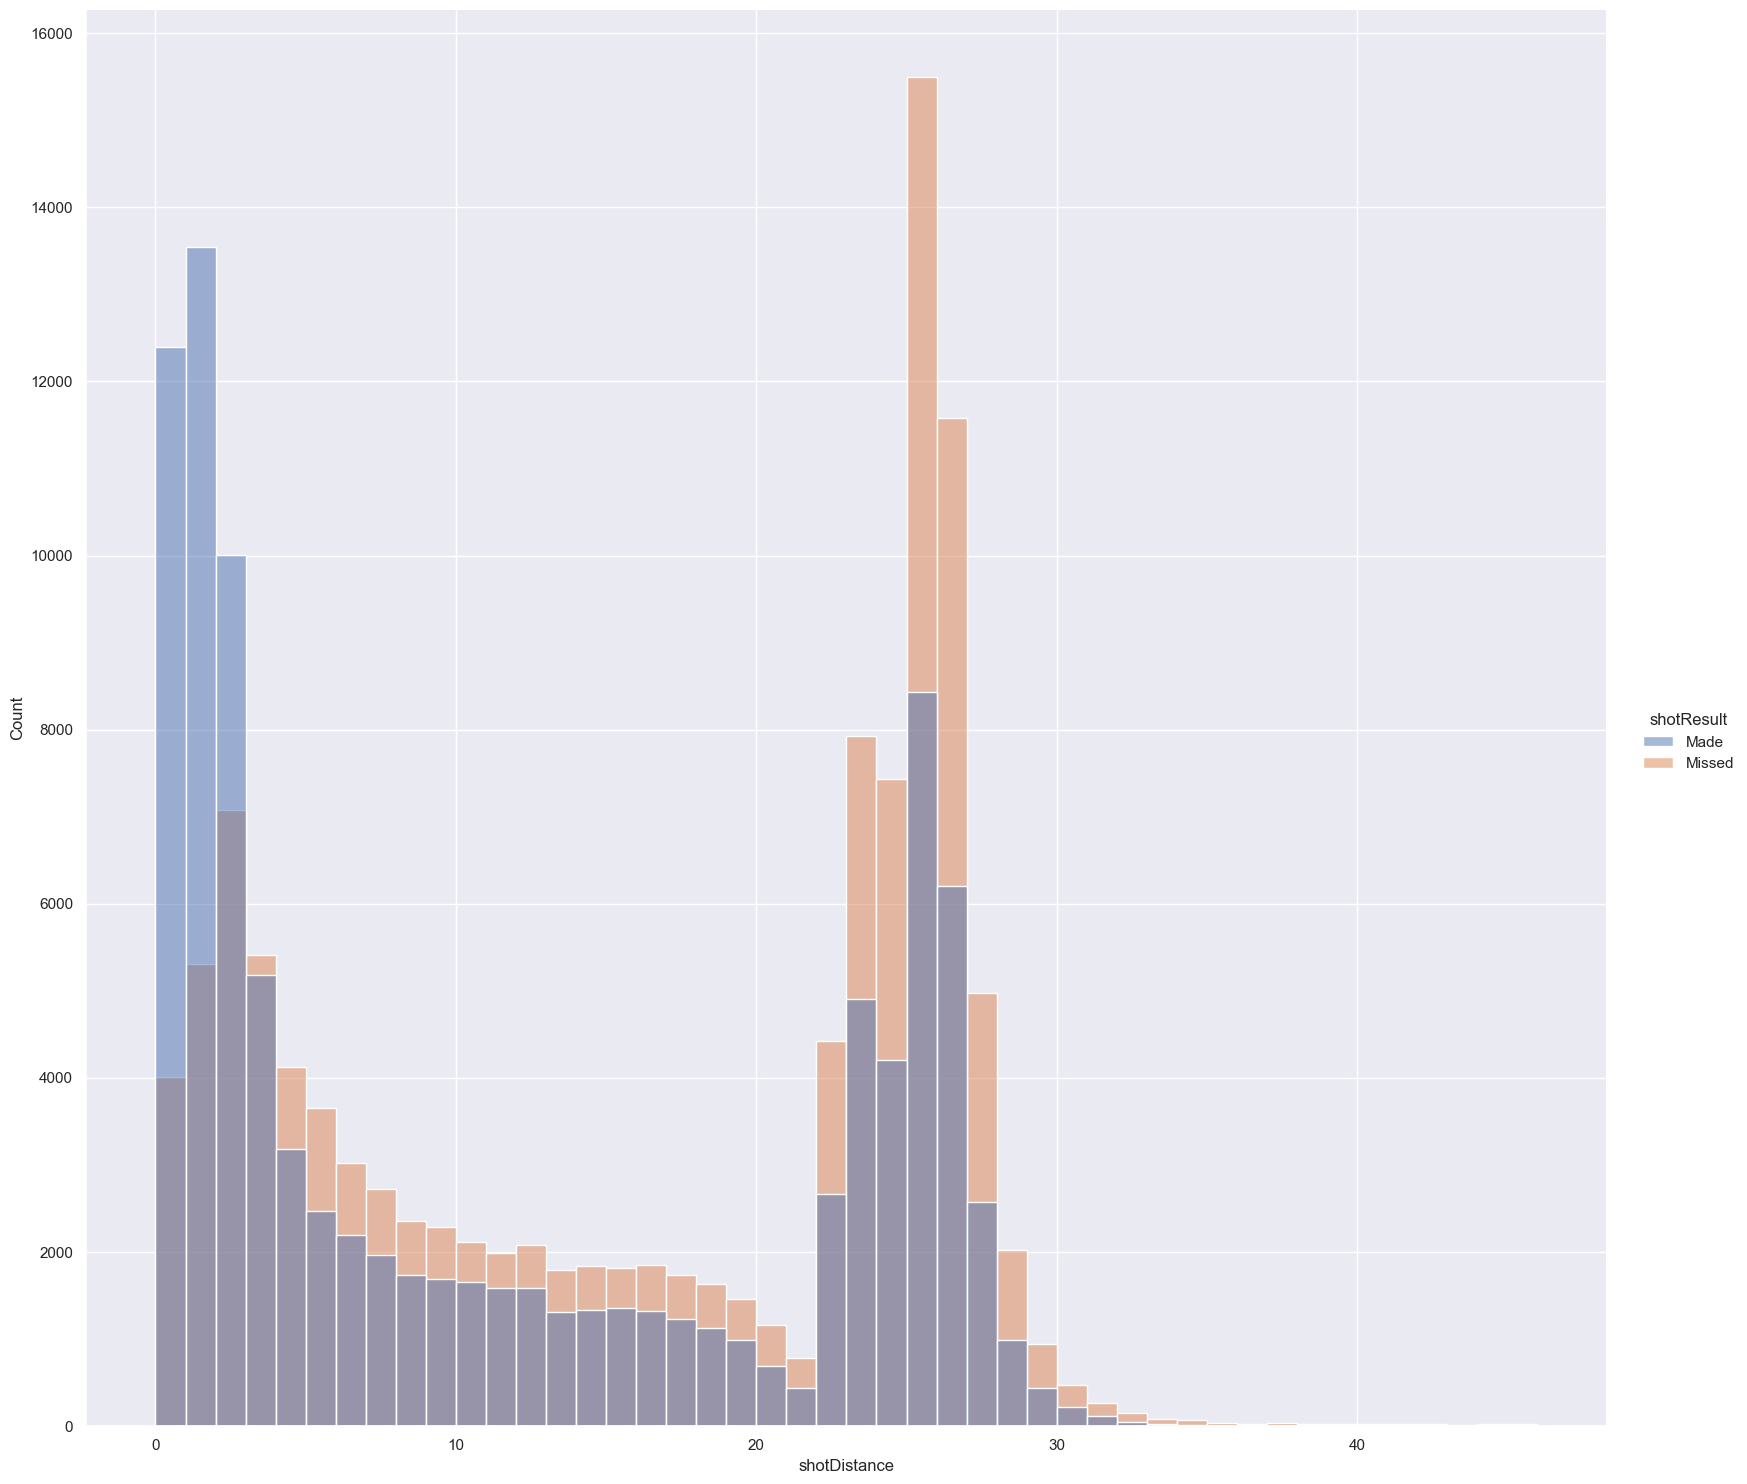

In [572]:
sns.set(rc={'figure.figsize':(7,7)})
sns.displot(df_shots_combined,x='shotDistance', binwidth=1, hue='shotResult', height=15, aspect=1.10);

# Get x axis to show ticks every 2 feet

## Analyzing Best players in the clutch
### % of team points and total points in clutch
#### Clutch is defined as games where teams are within 5 points under 5 minutes remaining

In [574]:
df_clutch = final_df_copy
# creating a date column
df_clutch['dateGameStarted'] = pd.to_datetime(df_clutch.timeActual).dt.date

# Need to use columns:  Period and Clock to determine what time in the game it is (Clock counts down per period)
# period_to_total_time 

# create a fucntion and use map to apply it to the new column

def period_to_time_conversion(value) -> int:

    if value == 1:
        return 0
    elif value == 2:
        return 12
    elif value == 3:
        return 24
    else:
        return 36

df_clutch['period_to_time'] = df_clutch['period'].map(period_to_time_conversion)    

def time_conversion(unparsed_timearray):
    x = datetime(year =1900, month=1, day=1, hour=0, minute=12, second=0)
    values_array = unparsed_timearray[0:7]
    time_passed_total = x - pd.to_datetime(values_array, format='PT%MM%S')
    return time_passed_total

df_clutch['time_passed_in_seconds'] = df_clutch['clock'].map(time_conversion)

# Creating a function to create new column with total time passed in game
def total_time_passed(period_finished_minutes, minutes_passed_within_period):
    period_minutes = pd.to_datetime(period_finished_minutes, format='%M')
    minutes_within_period = minutes_passed_within_period
    return period_minutes + minutes_within_period

df_clutch['Total_time_passed_in_game'] = list(map(total_time_passed, df_clutch.period_to_time, df_clutch.time_passed_in_seconds))

In [576]:
df_clutch

,actionNumber,clock,timeActual,period,periodType,actionType,subType,qualifiers,personId,x,y,possession,scoreHome,scoreAway,edited,orderNumber,xLegacy,yLegacy,isFieldGoal,side,description,personIdsFilter,teamId,teamTricode,descriptor,jumpBallRecoveredName,jumpBallRecoverdPersonId,playerName,playerNameI,jumpBallWonPlayerName,jumpBallWonPersonId,jumpBallLostPlayerName,jumpBallLostPersonId,shotDistance,shotResult,pointsTotal,assistPlayerNameInitial,assistPersonId,assistTotal,shotActionNumber,reboundTotal,reboundDefensiveTotal,reboundOffensiveTotal,officialId,foulPersonalTotal,foulTechnicalTotal,foulDrawnPlayerName,foulDrawnPersonId,blockPlayerName,blockPersonId,turnoverTotal,stealPlayerName,stealPersonId,value,gameid,dateGameStarted,period_to_time,time_passed_in_seconds,Total_time_passed_in_game
0,2,PT12M00.00S,2022-04-11T01:41:15.8Z,1,REGULAR,period,start,[],0,NaN,NaN,0,0,0,2022-04-11T01:41:15Z,20000,NaN,NaN,0,None,Period Start,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0022101220,2022-04-11,0,0 days 00:00:00,1900-01-01 00:00:00
1,4,PT11M57.00S,2022-04-11T01:41:17.9Z,1,REGULAR,jumpball,recovered,[],203085,NaN,NaN,1610612743,0,0,2022-04-11T01:41:17Z,40000,NaN,NaN,0,None,Jump Ball J. Green vs. W. Gabriel: Tip to A. R...,"[203085, 201145, 1629117]",1.610613e+09,DEN,startperiod,A. Rivers,203085.0,Rivers,A. Rivers,Green,201145.0,Gabriel,1629117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0022101220,2022-04-11,0,0 days 00:00:03,1900-01-01 00:00:03
2,7,PT11M39.00S,2022-04-11T01:41:35.2Z,1,REGULAR,3pt,Jump Shot,[],1627854,77.611695,88.970588,1610612743,3,0,2022-04-11T01:41:40Z,70000,195.0,158.0,1,right,B. Forbes 25' 3PT (3 PTS) (A. Rivers 1 AST),"[1627854, 203085]",1.610613e+09,DEN,NaN,NaN,NaN,Forbes,B. Forbes,NaN,NaN,NaN,NaN,25.09,Made,3.0,A. Rivers,203085.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0022101220,2022-04-11,0,0 days 00:00:21,1900-01-01 00:00:21
3,9,PT11M16.00S,2022-04-11T01:41:58.3Z,1,REGULAR,2pt,Layup,[pointsinthepaint],1626169,6.915243,46.568627,1610612747,3,2,2022-04-11T01:42:05Z,90000,17.0,13.0,1,left,S. Johnson Layup (2 PTS) (T. Horton-Tucker 1 AST),"[1626169, 1629659]",1.610613e+09,LAL,NaN,NaN,NaN,Johnson,S. Johnson,NaN,NaN,NaN,NaN,2.13,Made,2.0,T. Horton-Tucker,1629659.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0022101220,2022-04-11,0,0 days 00:00:44,1900-01-01 00:00:44
4,11,PT11M00.00S,2022-04-11T01:42:14.1Z,1,REGULAR,3pt,Jump Shot,[],1627854,68.413272,28.186275,1610612743,3,2,2022-04-11T01:42:17Z,110000,-109.0,244.0,1,right,MISS B. Forbes 26' 3PT,[1627854],1.610613e+09,DEN,NaN,NaN,NaN,Forbes,B. Forbes,NaN,NaN,NaN,NaN,26.76,Missed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0022101220,2022-04-11,0,0 days 00:01:00,1900-01-01 00:01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691870,720,PT00M11.90S,2021-10-20T04:43:25.6Z,4,REGULAR,freethrow,1 of 2,[],2738,NaN,NaN,1610612744,111,120,2021-10-20T04:43:25Z,7080000,NaN,NaN,0,None,A. Iguodala Free Throw 1 of 2 (11 PTS),[2738],1.610613e+09,GSW,NaN,NaN,NaN,Iguodala,A. Iguodala,NaN,NaN,NaN,NaN,NaN,Made,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0022100002,2021-10-20,36,0 days 00:11:49,1900-01-01 00:47:49
691871,721,PT00M11.90S,2021-10-20T04:43:39.9Z,4,REGULAR,freethrow,2 of 2,[],2738,NaN,NaN,1610612744,111,121,2021-10-20T04:43:39Z,7090000,NaN,NaN,0,None,A. Iguodala Free Throw 2 of 2 (12 PTS),[2738],1.610613e+09,GSW,NaN,NaN,NaN,Iguodala,A. Iguodala,NaN,NaN,NaN,NaN,NaN,Made,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0022100002,2021-10-20,36,0 days 00:11:49,1900-01-01 00:47:49
691872,722,PT00M07.00S,2021-10-20T04:4

In [581]:
df_clutch = df_clutch.astype({'scoreHome': 'int64', 'scoreAway':'int64'})

In [587]:
df_clutch_final = df_clutch[(df_clutch['Total_time_passed_in_game'] >='1900-01-01 00:43:00' ) &\
                                     (abs(df_clutch['scoreHome']- df_clutch['scoreAway']) <= 5)]

In [589]:
df_clutch_final[['Total_time_passed_in_game', 'teamTricode', 'scoreAway', 'scoreHome', 'actionNumber']][(df_clutch_final.teamTricode == 'LAL') & (df_clutch_final.actionNumber >= 200)]

,Total_time_passed_in_game,teamTricode,scoreAway,scoreHome,actionNumber
517,1900-01-01 00:43:04,LAL,118,123,640
519,1900-01-01 00:43:19,LAL,118,123,643
520,1900-01-01 00:43:24,LAL,118,123,644
565,1900-01-01 00:47:09,LAL,130,135,702
567,1900-01-01 00:47:34,LAL,130,135,704
...,...,...,...,...,...
669594,1900-01-01 00:47:59,LAL,118,119,723
669597,1900-01-01 00:47:59,LAL,118,120,729
669598,1900-01-01 00:47:59,LAL,118,121,733
669600,1900-01-01 00:47:59,LAL,118,121,732


In [424]:
#Notes for to dos for this data set
# --What duo had the most assits to dunks in the NBA
# -- Most points in the clutch (under 3 minutes left when a game is within 5 points)
# -- Teams shooting % 2PT vs 3PT
# --best assist to turn over ratio
# -- distribution of made shots per team
# do one of those attribute hexagon charts where I plot 3pt, 2pt (type of 2 pt), and free throw % of each team


# Done---------------->
# --Calculate true shooting % of all players? using apply? or creating a function... probably this
#     #TS% - True Shooting Percentage; the formula is PTS / (2 * TSA). True shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.
#     #TSA - True Shooting Attempts; the formula is FGA + 0.44 * FTA.

# --Look at % of makes of shots based on distance



#############################################################################
# """
# Add Stats around TS and other stats like variability and a distribution curve
# Plot it againts league average 
# Grab players that exhibit the most varibaility or the least
# """
#############################################################################

#### - Might have to seperate TIMEACTUAL field into date and time

## THIS IS ANALYSIS

In [425]:
#Looking at shots taken from rounded distances
final_df_copy.loc[:,['shotDistance']].round().value_counts()#.sort_index()

shotDistance
26.0            22892
2.0             19249
25.0            18937
1.0             16445
3.0             13577
                ...  
82.0                1
83.0                1
84.0                1
88.0                1
89.0                1
Length: 87, dtype: int64

In [426]:
#breaking down shot distance and the % of total shots made from the distance
final_df_copy.loc[:, ['shotResult']].value_counts()

shotResult
Made          141587
Missed        128907
dtype: int64

In [427]:
final_df_copy['actionType'].unique()

array(['period', 'jumpball', '3pt', '2pt', 'rebound', 'foul', 'timeout',
       'block', 'freethrow', 'substitution', 'turnover', 'steal',
       'stoppage', 'violation', 'instantreplay', 'game', 'memo',
       'ejection'], dtype=object)

In [428]:
#pulling rows where actionType = 'block'
final_df_copy[final_df_copy.actionType == 'block']

,actionNumber,clock,timeActual,period,periodType,actionType,subType,qualifiers,personId,x,y,possession,scoreHome,scoreAway,edited,orderNumber,xLegacy,yLegacy,isFieldGoal,side,description,personIdsFilter,teamId,teamTricode,descriptor,jumpBallRecoveredName,jumpBallRecoverdPersonId,playerName,playerNameI,jumpBallWonPlayerName,jumpBallWonPersonId,jumpBallLostPlayerName,jumpBallLostPersonId,shotDistance,shotResult,pointsTotal,assistPlayerNameInitial,assistPersonId,assistTotal,shotActionNumber,reboundTotal,reboundDefensiveTotal,reboundOffensiveTotal,officialId,foulPersonalTotal,foulTechnicalTotal,foulDrawnPlayerName,foulDrawnPersonId,blockPlayerName,blockPersonId,turnoverTotal,stealPlayerName,stealPersonId,value,gameid
26,35,PT08M35.00S,2022-04-11T01:47:48.8Z,1,REGULAR,block,NaN,[],1629659,NaN,NaN,1610612743,5,11,2022-04-11T01:47:50Z,350000,NaN,NaN,0,None,T. Horton-Tucker BLOCK (1 BLK),[1629659],1.610613e+09,LAL,NaN,NaN,NaN,Horton-Tucker,T. Horton-Tucker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0022101220
97,121,PT02M59.00S,2022-04-11T01:59:49.9Z,1,REGULAR,block,NaN,[],201961,NaN,NaN,1610612743,23,26,2022-04-11T01:59:53Z,1190000,NaN,NaN,0,None,W. Ellington BLOCK (1 BLK),[201961],1.610613e+09,LAL,NaN,NaN,NaN,Ellington,W. Ellington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0022101220
179,226,PT07M27.00S,2022-04-11T02:21:10.2Z,2,REGULAR,block,NaN,[],1630644,NaN,NaN,1610612743,47,48,2022-04-11T02:21:12Z,2260000,NaN,NaN,0,None,M. McClung BLOCK (1 BLK),[1630644],1.610613e+09,LAL,NaN,NaN,NaN,McClung,M. McClung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0022101220
198,248,PT06M48.00S,2022-04-11T02:28:27.0Z,2,REGULAR,block,NaN,[],201145,NaN,NaN,1610612747,49,50,2022-04-11T02:28:28Z,2450000,NaN,NaN,0,None,J. Green BLOCK (1 BLK),[201145],1.610613e+09,DEN,NaN,NaN,NaN,Green,J. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0022101220
300,373,PT11M07.00S,2022-04-11T03:07:24.0Z,3,REGULAR,block,NaN,[],202326,NaN,NaN,1610612747,71,72,2022-04-11T03:07:26Z,3660000,NaN,NaN,0,None,D. Cousins BLOCK (1 BLK),[202326],1.610613e+09,DEN,NaN,NaN,NaN,Cousins,D. Cousins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0022101220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691323,76,PT06M17.00S,2021-10-20T02:23:09.8Z,1,REGULAR,block,NaN,[],203076,NaN,NaN,1610612744,14,12,2021-10-20T02:23:12Z,760000,NaN,NaN,0,None,A. Davis BLOCK (1 BLK),[203076],1.610613e+09,LAL,NaN,NaN,NaN,Davis,A. Davis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0022100002
691382,152,PT01M50.00S,2021-10-20T02:38:36.4Z,1,REGULAR,block,NaN,[],2738,NaN,NaN,1610612747,30,23,2021-10-20T02:38:40Z,1490000,NaN,NaN,0,None,A. Iguodala BLOCK (1 BLK),[2738],1.610613e+09,GSW,NaN,NaN,NaN,Iguodala,A. Iguodala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0022100002
691512,295,PT04M52.00S,2021-10-20T03:05:30.7Z,2,REGULAR,block,NaN,[],1626172,NaN,NaN,1610612747,46,43,2021-10-20T03:05:33Z,2880000,NaN,NaN,0,None,K. Looney BLOCK (1 BLK),[1626172],1.610613e+09,GSW,NaN,NaN,NaN,Looney,K. Looney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0022100002
691538,324,PT02M47.00S,2021-10-20T03:08:22.6Z,2,REGULAR,block,NaN,[],203145,NaN,NaN,1610612744,50,47,2021-10-20T03:08:27Z,3170000,NaN,NaN,0,None,K. Bazemore BLOCK (1 BLK),[203145],1.610613e+09,LAL,NaN,NaN,NaN,Bazemore,K. Bazemore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0022100002


In [429]:
#take shotDistance, actionType is 2pt and 3pt, shotResult is Missed or Made
all_actions = pd.DataFrame(final_df_copy.loc[:, ["shotDistance", "actionType", "shotResult"]])

In [430]:
all_actions

,shotDistance,actionType,shotResult
0,NaN,period,NaN
1,NaN,jumpball,NaN
2,25.09,3pt,Made
3,2.13,2pt,Made
4,26.76,3pt,Missed
...,...,...,...
691870,NaN,freethrow,Made
691871,NaN,freethrow,Made
691872,29.45,3pt,Made
691873,NaN,period,NaN


In [431]:
shots_df = all_actions[(all_actions.shotResult.isin(['Missed', 'Made'])) & (all_actions.actionType.isin(['2pt', '3pt']))]

In [432]:
shots_df

,shotDistance,actionType,shotResult
2,25.09,3pt,Made
3,2.13,2pt,Made
4,26.76,3pt,Missed
7,26.50,3pt,Made
8,2.86,2pt,Missed
...,...,...,...
691850,29.33,3pt,Missed
691852,27.10,3pt,Missed
691862,25.19,3pt,Made
691868,3.82,2pt,Made


In [433]:
shots_df.sort_index(axis = 1, inplace = True)
shots_df = shots_df.round()

/var/folders/_l/4wqjn4456n15dy3l1xmxt0nh0000gn/T/ipykernel_3085/717320966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots_df.sort_index(axis = 1, inplace = True)


In [434]:
#shots_df.shotResult.replace(['Missed', 0], ['Made', 1])
shots_df['shotResult'] = shots_df.shotResult.replace(['Missed','Made'], [0, 1])

In [435]:
shots_df.shotResult.value_counts()

0    116783
1     99930
Name: shotResult, dtype: int64

In [436]:
def percentcalc(x):
    for i in shots_df[shots_df.shotResult]:
        if shots_df[shots_df.shotResult == 'Made']:
            return 1
        else:
            return 0

In [437]:
# shots_df.map(percentcalc)

In [438]:
# shots_grouped.shotResult.sum()

## Analyzing what players has the most assits to a dunk 

In [439]:
#looking into what player has assisted the most dunks in the nba (or per team)
assists = final_df[(final_df.subType == 'DUNK') & (final_df.periodType == 'REGULAR')].loc[:,['assistPlayerNameInitial','playerNameI','teamTricode', 'teamId' ]]

In [440]:
#adding new col with combined player
assists = assists[pd.notnull(assists.assistPlayerNameInitial)]

In [441]:
assists['assistor-assiste'] = assists.assistPlayerNameInitial + '  to  ' + assists.playerNameI  

In [442]:
# assists.columns()

In [443]:
assistsfinal = assists.loc[: ,['teamTricode','assistor-assiste']].sort_values(by=['teamTricode'])

In [444]:
assists_grouped = assistsfinal.groupby(['teamTricode','assistor-assiste'])['assistor-assiste'].count()

In [445]:
assists_grouped

teamTricode  assistor-assiste               
ATL          B. Bogdanovic  to  C. Capela       6
             B. Bogdanovic  to  D. Gallinari    3
             B. Bogdanovic  to  D. Hunter       3
             B. Bogdanovic  to  J. Collins      1
             B. Bogdanovic  to  J. Johnson      1
                                               ..
WAS          T. Satoransky  to  C. Kispert      2
             T. Satoransky  to  D. Gafford      5
             T. Satoransky  to  K. Porzingis    6
             T. Satoransky  to  R. Hachimura    4
             T. Satoransky  to  T. Bryant       1
Name: assistor-assiste, Length: 2570, dtype: int64